In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carregar os dados do arquivo Excel
file_path = r'G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\ENERGIA_v3.xlsx'
data = pd.read_excel(file_path)

In [3]:
data

,ID_Rota,E_cinetica,E_gravit,E_atrito,E_res_ar,E_Regen_Lin,E_Regen_Exp,ENERGIA EST. (%),ENERGIA EST. REG. LIN. (%),ENERGIA EST. REG. EXP. (%),TBGREEN (%)
0,20230901_RHQ2H04,0.199537,0.098231,0.195568,0.051162,-0.040010,-0.043564,0.544498,0.504488,0.500934,0.412
1,20230902_RHS6B08,0.185326,0.111138,0.248889,0.070658,-0.043772,-0.047662,0.616011,0.572240,0.568350,0.416
2,20230902_RHS6F90,0.207013,0.219680,0.221214,0.058543,-0.045707,-0.049484,0.706450,0.660743,0.656966,0.464
3,20230902_RHT4G96,0.194500,0.101624,0.222006,0.072888,-0.043379,-0.047387,0.591018,0.547639,0.543631,0.380
4,20230904_RHQ2H05,0.258944,0.334974,0.262168,0.052849,-0.057489,-0.062224,0.908935,0.851446,0.846711,0.524
...,...,...,...,...,...,...,...,...,...,...,...
172,20240215_RHS6B06,0.166173,0.125845,0.214158,0.056880,-0.028350,-0.030652,0.563055,0.534705,0.532403,0.368
173,20240220_RHS6F91,0.166800,0.090850,0.246604,0.061937,-0.033697,-0.037042,0.566190,0.532493,0.529148,0.372
174,20240222_RHQ2H03,0.191980,0.162978,0.241654,0.072461,-0.043122,-0.047185,0.669073,0.625951,0.621888,0.532
175,20240226_RHS6F92,0.219499,0.170535,0.301118,0.068606,-0.042007,-0.045774,0.759758,0.717750,0.713983,0.444


In [4]:
# Separar variáveis explicativas e variável preditora
X = data[['E_cinetica', 'E_gravit', 'E_atrito', 'E_res_ar', 'E_Regen_Lin']]
y = data['TBGREEN (%)']

# Adicionar constante ao conjunto de dados para estimar o intercepto
X = sm.add_constant(X)

# Dividir os dados em conjuntos de treinamento e teste
# Usar semente 697
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=697)

# Criar o modelo de regressão linear
model = sm.OLS(y_train, X_train)

# Ajustar (fit) o modelo aos dados de treinamento
results = model.fit()

residuos = results.resid

# Imprimir o relatório da regressão
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            TBGREEN (%)   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     63.34
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.00e-33
Time:                        13:19:14   Log-Likelihood:                 217.86
No. Observations:                 141   AIC:                            -423.7
Df Residuals:                     135   BIC:                            -406.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1170      0.022      5.365      

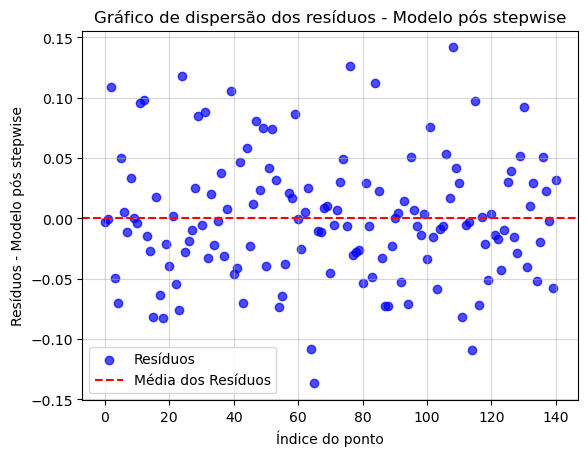

In [86]:
# Calculando a média dos resíduos
media_residuos = np.mean(residuos)

# Plotando o scatter plot
plt.scatter(range(len(residuos)), residuos, color='blue', alpha=0.7, label='Resíduos')
plt.axhline(y=media_residuos, color='red', linestyle='--', label='Média dos Resíduos')
plt.xlabel('Índice do ponto')
plt.ylabel('Resíduos - Modelo pós stepwise')
plt.title('Gráfico de dispersão dos resíduos - Modelo pós stepwise')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

In [87]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Suponha que você tenha ajustado um modelo de regressão e tenha os resíduos e as variáveis explicativas
# Substitua 'residuos' pelos seus resíduos e 'X' pelas suas variáveis explicativas

# Realiza o teste de Breusch-Pagan/Cook-Weisberg
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, X_train)

# Imprime os resultados
print("Estatística LM:", lm)
print("Valor-p LM:", lm_p_value)
print("Estatística F:", fvalue)
print("Valor-p F:", f_p_value)

Estatística LM: 3.8289631717680344
Valor-p LM: 0.42964773562919933
Estatística F: 0.9490687746505324
Valor-p F: 0.43779443827942066


In [88]:
from scipy.stats import norm

# Calcula o teste de Durbin-Watson
durbin_watson_test = sm.stats.stattools.durbin_watson(residuos)

# Imprime o resultado
print("Estatística de Durbin-Watson:", durbin_watson_test)

nobs = len(residuos)
nvars = 4  

# Calculando o valor crítico DW
d_critico = sm.stats.stattools.durbin_watson(residuos)

# Calculando DL, DU, 4-DL e 4-DU
DL = 1.521 - 1.25 * (nvars / nobs)
DU = 1.521 + 1.25 * (nvars / nobs)
quatro_DL = 4.0 - DL
quatro_DU = 4.0 - DU

# Imprimindo os resultados
print("DL:", DL)
print("DU:", DU)
print("4-DL:", quatro_DL)
print("4-DU:", quatro_DU)

Estatística de Durbin-Watson: 2.013258913042555
DL: 1.4855390070921985
DU: 1.5564609929078013
4-DL: 2.5144609929078015
4-DU: 2.4435390070921987


In [89]:
y_train

170    0.480
130    0.552
29     0.664
41     0.360
91     0.352
       ...  
26     0.424
56     0.572
127    0.368
82     0.492
162    0.460
Name: TBGREEN (%), Length: 141, dtype: float64

In [90]:
predicted_values = results.predict(X_train)

# Criar DataFrame com os valores originais, previstos e resíduos
df = pd.concat([predicted_values, y_train, residuos*100], axis=1)
df.columns = ['y_pred_treino', 'y_train', 'Resíduos']

df

,y_pred_treino,y_train,Resíduos
170,0.482995,0.480,-0.299512
130,0.552267,0.552,-0.026666
29,0.554689,0.664,10.931104
41,0.409471,0.360,-4.947145
91,0.422018,0.352,-7.001778
...,...,...,...
26,0.373124,0.424,5.087575
56,0.549359,0.572,2.264087
127,0.370202,0.368,-0.220247
82,0.550031,0.492,-5.803133


In [91]:
# Teste de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print("Estatística de teste:", shapiro_test[0])
print("Valor-p:", shapiro_test[1])

Estatística de teste: 0.9834832549095154
Valor-p: 0.08745681494474411


In [92]:
# Fazer previsões usando o conjunto de teste
y_pred_test = results.predict(X_test)

# Avaliar o desempenho do modelo no conjunto de teste
mse_test = mean_squared_error(y_test, y_pred_test)
print('Erro quadrático médio (MSE) no conjunto de teste:', mse_test*10000)

Erro quadrático médio (MSE) no conjunto de teste: 18.660156744308882


In [93]:
df_predicao = pd.DataFrame({'TBGREEN (%)': y_test, 'TBGREEN Previsto (%)': y_pred_test})
df_predicao['Delta'] = df_predicao['TBGREEN Previsto (%)'] - df_predicao['TBGREEN (%)']

In [94]:
X_test.head()

,const,E_cinetica,E_gravit,E_atrito,E_res_ar
115,1.0,0.242123,0.236275,0.286957,0.068970
73,1.0,0.137089,0.085327,0.209314,0.070312
122,1.0,0.226802,0.129614,0.216386,0.068739
50,1.0,0.278077,0.184864,0.289360,0.091946
149,1.0,0.173835,0.224308,0.176251,0.029556


In [95]:
y_pred_test.head()

115    0.535488
73     0.375977
122    0.443718
50     0.547253
149    0.415933
dtype: float64

In [96]:
y_pred = pd.DataFrame(y_pred_test)
y_test = pd.DataFrame(y_test)
y_pred.index = y_test.index

df_combined = pd.concat([y_pred,y_test], axis=1)
df_combined.columns = ['y_pred', 'y_test']

df_combined['y_pred'] = (df_combined['y_pred'])
df_combined['y_test'] = (df_combined['y_test'])

df_combined['dif'] = (df_combined['y_pred'] - df_combined['y_test'])*100

mse = mean_squared_error(df_combined['y_pred']*100, df_combined['y_test']*100)
print("MSE:", mse)

SSE = (df_combined['dif'] ** 2).sum()
SST = ((df_combined['y_test']*100 - df_combined['y_test'].mean()*100) ** 2).sum()

R2 = 1 - (SSE/SST)
print("Coeficiente de determinação (R²):", R2)

df_combined

MSE: 18.66015674430888
Coeficiente de determinação (R²): 0.7237240267947715


,y_pred,y_test,dif
115,0.535488,0.476,5.948788
73,0.375977,0.400,-2.402309
122,0.443718,0.432,1.171847
50,0.547253,0.588,-4.074675
149,0.415933,0.408,0.793314
33,0.570086,0.648,-7.791448
165,0.421019,0.508,-8.698102
172,0.401410,0.368,3.341016
133,0.458637,0.444,1.463685
31,0.578533,0.608,-2.946673


In [97]:
caminho_arquivo = r"C:\Users\duart\OneDrive\Desktop\multipla_semRegen.xlsx"

# Salvar o DataFrame em um arquivo Excel no caminho especificado
df_combined.to_excel(caminho_arquivo, index=False)

print("DataFrame salvo com sucesso em", caminho_arquivo)

DataFrame salvo com sucesso em C:\Users\duart\OneDrive\Desktop\multipla_semRegen.xlsx


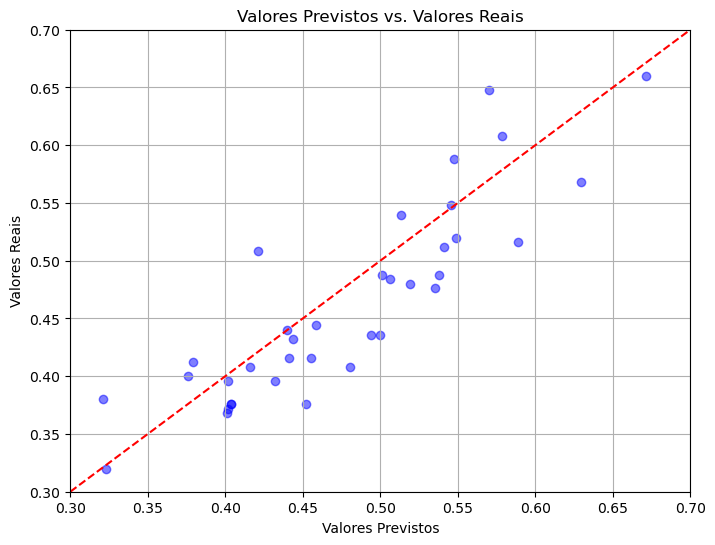

In [98]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df_combined['y_pred'], df_combined['y_test'], color='blue', alpha=0.5)
plt.plot([0.3, 0.7], [0.3, 0.7], color='red', linestyle='--')
plt.title('Valores Previstos vs. Valores Reais')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')

# Definir limites para os eixos x e y
x_min = 0.3
x_max = 0.7
plt.xlim(x_min, x_max)
plt.ylim(x_min, x_max)

plt.grid(True)
plt.show()
